# Digit Recognizer

### Reference
Introduction to CNN Keras<br>
https://www.kaggle.com/c/digit-recognizer/data

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [73]:
pd.set_option('max_columns',500)
pd.set_option('max_rows',500)

In [74]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submit = pd.read_csv('sample_submission.csv')

In [75]:
train.shape, test.shape, submit.shape

((42000, 785), (28000, 784), (28000, 2))

In [76]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,...,pixel534,pixel535,pixel536,pixel537,pixel538,pixel539,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixe

## Data Analysis

### Explore data
- label :  the digit that was drawn by the user
- pixel0-784 : the pixel-values of the associated image

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,...,pixel534,pixel535,pixel536,pixel537,pixel538,pixel539,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixe

In [8]:
# Separating x and y variable
y_train = train['label']
x_train = train.drop('label', axis=1)

In [9]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

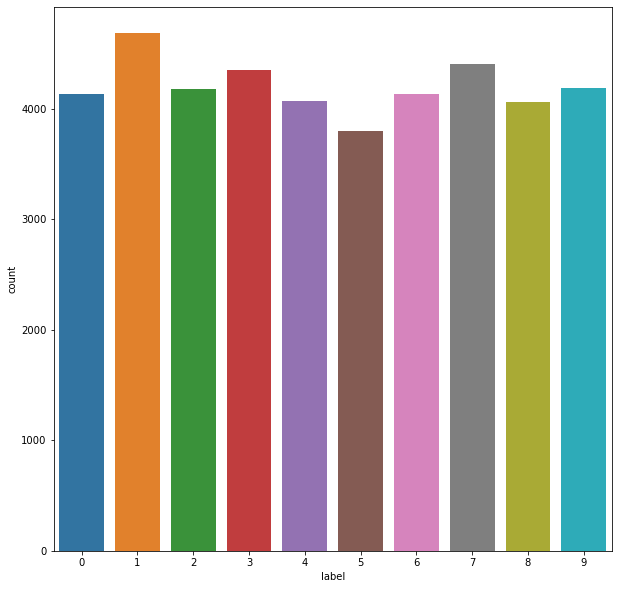

In [10]:
# visualize about y_train
plt.figure(figsize=[10,10])
sns.countplot(y_train)

In [11]:
# check the missing values
x_train.isnull().describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,...,pixel534,pixel535,pixel536,pixel537,pixel538,pixel539,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,p

In [12]:
test.isnull().describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,...,pixel534,pixel535,pixel536,pixel537,pixel538,pixel539,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,p

In [13]:
y_train.values

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [14]:
x_train = x_train.values.astype('float32')
y_train = y_train.values.astype('int32')
test = test.values.astype('float32')

- .reshape(28,28) : 이미지 크기를 28X28 크기로 shape 지정
- plt.imshow()
    -  cmap = matplotlib.cm.binary : binary 컬러 맵을 사용해서 그린다
<br><br>
- plt.axis('off') : axis를 제거하는 함수
<br><br>
- plt.subplots_adjust(left, bottom, right, top, wspace, hspace) : 현재 배치되어 있는 subplot들의 위치를 직접 조정하는 함수 
    - left, bottom, right, top : 서브플롯 4면의 위치 조정
    - hspace, wspace : 서브플롯 간의 간격을 위해 각각 figure의 너비와 높이에 대한 비율 조절

In [15]:
x_train.shape[0]

42000

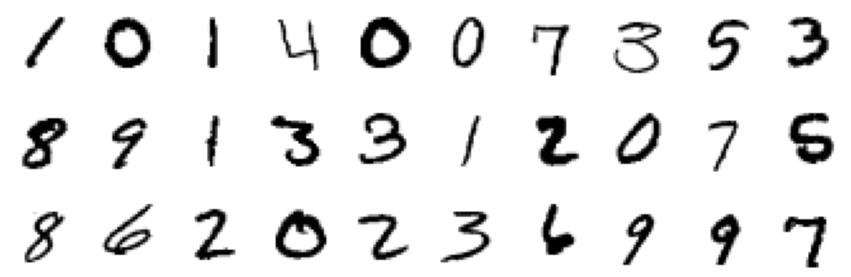

In [16]:
# display images
x_train = x_train.reshape(x_train.shape[0], 28, 28)

plt.figure(figsize=[15,5])
for i in range(30) : 
    plt.subplot(3, 10, i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.axis('off')
    
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

In [17]:
x_train.shape

(42000, 28, 28)

### Normalization(정규화)

Data Normalization 은 데이터의 범위를 사용자가 원하는 범위로 제한하는 것이다. 이미지 데이터의 경우 픽셀 정보를 0-255 사이의 값으로 가지는데, 이를 255로 나누어주면 0~1.0 사이의 값을 가지게 될 것이다.
<br><br>
위의 예를 수식으로 간단하게 쓴다면, (정규화하고자 하는 값 - 데이터 값들 중 최소값) / (데이터 값들 중 최대값 - 데이터 값들 중 최소값) 이다. 
<br><br>
다른 방법으로는 (정규화하고자 하는 값 - 데이터의 평균) / 데이터의 표준편차가 있다.
<br><br>
normalization을 하는 이유는 학습을 더 빨리하고 Local optimum 에 빠지는 가능성을 줄이는 등의 다양한 실용적 이유가 있다. 
<br><br>
빛의 차이에 영향을 줄이기 위해 정규화한다. 더욱이 cnn이 더 빠르게 작동한다. 

In [18]:
x_train = x_train / 255.0
test = test / 255.0

In [19]:
x_train.shape, test.shape

((42000, 28, 28), (28000, 784))

### reshape
- reshape(batch_size, width, height, channel)

keras가 channel이 같도록 추가 차원이 필요하여 28 x 28 x 1인 3차원으로 재구성한다.

batch_size를 -1로 두면 자동으로 batch_size를 조정하겠다는 뜻이다. 

In [20]:
x_train = x_train.reshape(-1, 28, 28, 1)
test = test.reshape(-1, 28, 28, 1)

In [21]:
x_train.shape, test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

### label encoding

one-hot encoding으로 문자를 숫자로 바꾸어준다.<br>

keras.utils.np_utils 패키지에 있는 to_categorical함수는 one hot encoding 해주는 함수이다. (one hot encoding은 10진 정수 형식을 특수한 2진 바이너리 형식으로 변경한 것이다.)

In [22]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)

In [23]:
#y_train

In [24]:
y_train.shape[1]

10

([<matplotlib.axis.XTick at 0x2433d0f4040>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

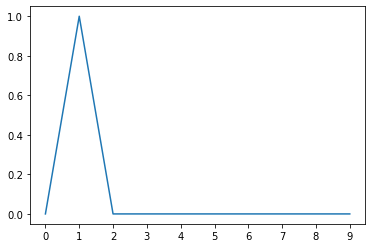

In [25]:
plt.plot(y_train[0])
plt.xticks(range(10))

### split training and testing set

- test_size : 테스트 데이터셋의 비율로 train_size의 옵션과 반대 관계에 있는 옵션 값이며, 주로 test_size를 지정해 준다. <br>(default = 0.25)<br> ex) 0.2는 전체 데이터 셋의 20%를 test (validation) 셋으로 지정하겠다는 의미이다.
- random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력)<br>하이퍼 파라미터를 튜닝시 이 값을 고정해두고 튜닝해야 매번 데이터셋이 변경되는 것을 방지할 수 있다. 
- shuffle : split을 해주기 이전에 섞을건지 여부 (default = True)
- stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.<br> stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해준다. (한 쪽에 쏠려서 분배되는 것을 방지한다.)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=2)

In [27]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

### cnn

keras에서는 모델을 만드는데 두 가지 방법이 있는데 Sequential 모델은 순차적으로 레이어 층을 더해주기 때문에 순차모델이라 불리고 만들기도 쉽다.<br>
입력층, 은닉층, 출력층을 구성하기 위해 Sequential()을 사용한다.<br> Sequential()을 model로 선언한 뒤에 model.add()라는 코드를 통해 층을 단계적으로 추가한다. 아래는 model.add()로 층을 추가하는 예제 코드로 괄호 사이에는 실제 층의 이름을 넣는다. 
```
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(...) # 층 추가
model.add(...) # 층 추가
model.add(...) # 층 추가
```

Dense()는 전결합층(fully-conntected layer)을 추가하는 함수로, model.add()를 통해 추가할 수 있다.
```
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(1, input_dim=3, activation='relu'))
```
위의 코드는 3개의 입력층 뉴런과 1개의 출력층 뉴런을 의미한다.<br>

Dense()는 한번 사용되었지만 더 많은 층을 추가할 수 있다.

Dense()를 사용하여 전결합층을 하나 더 추가해보면,
```
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력층
```
첫번째 사용된 Dense()의 8이라는 값은 더 이상 출력층의 뉴런이 아니라 은닉층의 뉴런이다. 뒤에 층이 하나 더 생겼기 때문에이다.<br>

두번째 Dense()는 input_dim 인자가 없는데, 이는 이미 이전층의 뉴런의 수가 8개라는 사실을 알고있기 때문이다. 위의 코드에서 두번째 Dense()는 마지막 층이므로, 첫번째 인자 1은 결국 출력층의 뉴런의 개수가 된다.

이 외에도 LSTM, GRU, Convolution2D, BatchNormalization 등 다양한 층을 만들 수 있다. 

#### Dense

- 첫번째 인자는 출력 뉴런의 수
- input_dim는 입력 뉴런의 수(입력의 차원)
- activation : 활성화 함수
    - relu : 은닉 층으로 학습, 'relu'는 은닉층으로 역전파를 통해 좋은 성능이 나오기 때문에 마지막 층이 아니고서야 거의 relu 를 이용한다.  => 데이터 전처리용
    - sigmond : yes or no 와 같은 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수  => 출력수는 1
    - softmax : 확률 값을 이용해 다양한 클래스를 분류하기 위한 문제 (셋 이상을 분류하는 다중 클래스 분류 문제에서 출력층에 주로 사용)   => 출력 수는 클래스 갯수와 동일
    - linear : 디폴트 값으로 별도 활성화 함수 없이 입력 뉴런과 가중치의 계산 결과 그대로 출력 ex)선형 회귀

-----------------

#### Conv2D
Conv2D는 2차원 이미지를 다루는 컨볼루션 레이어 클래스이다.
- filters: 몇 개의 다른 종류의 필터를 활용할 것인지를 나타내고 출력 모양의 깊이(depth) 를 결정한다.
- kernel_size: 연산을 수행할 때 윈도우의 크기를 의미한다.
- strides: 연산을 수행할 때 윈도우가 가로 그리고 세로로 움직이면서 내적 연산을 수행하는데, 한 번에 얼마나 움직일지를 의미한다.
- valid: 패딩을 하지 않는다.(사이즈가 맞지 않을 경우 가장 우측의 열 혹은 가장 아래의 행을 드랍한다).
- same: 필터의 사이즈가 k이면 사방으로 k/2 만큼의 패딩을 준다.

-----------------

#### MaxPool2D
MaxPool2D는 최대 풀링 레이어로, 컨볼루션 레이어에서 더 많이 사용되는 레이어이다. 사소한 픽셀의 값을 무시하고, 가장 큰 특징을 나타내는 값을 기록하는 방식이다.
- pool_size: 연산 범위를 의미합니다. 해당 범위 내의 가장 큰 수만을 가져온다.
- strides: Conv2D레이어에서의 역할과 동일하다.

-----------------

#### Dropout
Dropout Layer는 네트워크가 과적합되는 경우를 방지하기 위해서 만들어진 레이어이다. 이것은 학습 과정에서 무작위로 뉴런의 집합을 제거하는 것이 과적합을 막는다는 아이디어에서 나왔다. 

<br>
이러한 드롭아웃 레이어는 모든 주요 컨볼루션 신경망에 사용되고 있다. 해당 레이어도, 가중치가 존재하지 않아서 학습이 되지 않다.
- rate: 제외할 뉴런의 비율을 나타내는 값

-----------------

#### BatchNormalization()
배치 정규화는 인공신경망에 입력값을 평균 0, 분산 1로 정규화(normalize)해 네트워크의 학습이 잘 일어나도록 돕는 방식이다. 배치(batch)는 가중치 학습을 위해 경사하강법(gradient descent)을 적용할 때 모델이 입력을 받는 데이터의 청크(즉, 일부 데이터 인스턴스)이다.<br><br>

케라스에서 모델을 학습할 때 fit()함수를 적용할 때 설정하는 batch_size 파라미터는 바로 이 데이터의 청크의 크기(개수)를 의미한다. 예를 들어 batch_size를 32로 적용하면 모델이 데이터 인스턴스를 32개 본 후에 가중치를 업데이트하는 것이며, 배치 정규화를 적용하면 각 32개의 데이터 인스턴스가 feature별로 정규화된다.<br><br>

케라스에서 배치 정규화는 하나의 레이어(BatchNormalization())처럼 작동하며, 보통 Dense 혹은 Convolution 레이어와 활성함수(Activation) 레이어 사이에 들어간다.<br>

-----------------
- model.summary() : 모델의 정보를 요약해서 보여주는 함수이다. 

    
참고 url : https://wikidocs.net/32105

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
#from keras.callbacks import ReduceLROnPlateau

In [29]:
# 모델 구성
model = Sequential()
# add를 통해 레이어 추가
model.add(Conv2D(filters=8, kernel_size=(5,5), padding='Same', input_shape=(28,28,1), activation='relu'))
# model.add(BatchNormalization())    
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

In [30]:
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', input_shape=(28,28,1), activation='relu')) 
# model.add(BatchNormalization())    
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

In [31]:
# fully connected model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())    
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [32]:
# 모델의정보를 요약
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0

### optimizer
model을 학습시키기 위해선 optimization라는 작업을 해준다. 기존의 방식과 다른 방식으로 가중치와 편향을 갱신할 수 있으며 이 방법들은 더 나은 성능의 신경망 모델을 만드는데 도움이 된다. 

##### Adam
sgd + momentum, RMSprop을 같이 사용하여 더욱 효율적으로 gradient를 조절한다.
- keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [33]:
from keras.optimizers import Adam

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

### compile model

- compile() : 학습 방식에 대한 환경을 설정한다. 
<br>

##### complie의 속성
- optimizer : 훈련과정을 설정한다. 즉, 최적화 알고리즘을 설정을 의미한다. 
    - adam, sgd, rmsprop, adagrad 등이 있다. 
- loss : 모델이 최적화에 사용되는 목적 함수이다. 
    - mse, categorical_crossentropy, binary_crossentropy 등이 있다.
- metrics : 훈련을 모니터링 하기 위해 사용된다. 
    - 분류에서는 accuracy, 회귀에서는 mse, rmse, r2, mae, mspe, mape, msle 등이 있다. 
    - 사용자가 메트릭을 정의해서 사용할 수도 있다.


In [34]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

gradient descent와 같이 결과를 내기 위해서 여러 번의 최적화 과정을 거쳐야 되는 알고리즘을 반복한다. 
<br><br>
하지만, 다루어야 할 데이터가 너무 많기도 하고(메모리가 부족하기도 하고) 한 번의 계산으로 최적화된 값을 찾는 것은 힘들다. 따라서, 머신 러닝에서 최적화(optimization)를 할 때는 일반적으로 여러 번 학습 과정을 거치고 한 번의 학습 과정 역시 사용하는 데이터를 나누는 방식으로 세분화 시킨다. 
<br><br>
이럴 때 epoch, batch size, iteration이 사용된다. 

#### epochs
한번의 epoch는 전체 데이터 셋에 대해 한 번 학습을 완료한 상태를 말한다. 
<br><br>
신경망에서 사용되는 역전파 알고리즘은 파라미터를 사용하여 입력부터 출력까지의 각 계층의 weight를 계산하는 과정을 거치는 순방향 패스(forward pass), forward pass를 반대로 거슬러 올라가며 다시 한 번 계산 과정을 거처 기존의 weight를 수정하는 역방향 패스(backward pass)로 나뉜다. <br>
이 전체 데이터 셋에 대해 해당 과정(forward pass + backward pass)이 완료되면 한 번의 epoch가 진행됐다고 볼 수 있다. 
<br><br>
모델을 만들 때 적절한 epoch 값을 설정해야만 underfitting과 overfitting을 방지할 수 있다. epoch 값이 너무 작다면 underfitting이 너무 크다면 overfitting이 발생할 확률이 높을 의미한다. 
     
     
#### batch size
batch size는 한 번의 batch마다 주는 데이터 샘플의 size를 의미한다. 즉, batch는 나눠진 데이터 셋을 뜻한다. 

In [35]:
epochs = 10
batch_size = 100

#### data augmentation

우리가 만든 모델이 오버피팅되어 있다면, 해결방법 중 하나는 훈련셋의 데이터 양을 늘리는 것입니다. 

케라스에서는 이에 대하여 ImageDataGenerator로 간편한 data augmentation 기능을 제공한다. 

imageDataGenerator는 실시간 데이터 증가로 텐서 이미지 데이터의 배치를 생성합니다.

##### 속성
- featurewise_center : boolean, 데이터 집합에 대해 특성별로 입력 평균을 0으로 설정
- samplewise_center : boolean, 각 표본 평균을 0으로 설정
- featurewise_std_normalization : boolean, 특성별로 입력을 데이터 세트의 표준으로 나눈다.
- samplewise_std_normalization : boolean, 각 입력을 표준으로 나눈다. 
- zca_epsilon : ZCA 미백 용 엡실론. 기본값은 1e-6
- zca_whitening : boolean, ZCA 미백
- rotation_range : 정수 무작위 회전의 각도 범위
- width_shift_range : Float, 1-D array-like 또는 int-float : 전체 너비의 비율 (<1 인 경우) 또는 픽셀 (> = 1 인 경우 픽셀)-1-D array-like : 배열의 임의 요소. - INT : 간격의 픽셀의 정수 (-width_shift_range, +width_shift_range) -와 width_shift_range=2가능한 값은 정수 [-1, 0, +1]와 같은 동일한 width_shift_range=[-1, 0, +1]반면에 width_shift_range=1.0가능한 값은 구간 [-1.0, 1.0) 에 플로트한다.

- height_shift_range : Float, 1-D array-like 또는 int-float : 전체 높이의 비율 (<1 인 경우) 또는 픽셀 (> = 1 인 경우 픽셀)-1-D 배열 유사 : 배열의 임의 요소. - INT : 간격의 픽셀의 정수 (-height_shift_range, +height_shift_range) -와 height_shift_range=2가능한 값은 정수 [-1, 0, +1]와 같은 동일한 height_shift_range=[-1, 0, +1]반면에 height_shift_range=1.0가능한 값은 구간 [-1.0, 1.0)에 플로트한다.

- shear_range : 부동. 전단 강도 (시계 반대 방향의 전단 각도 (도))
- zoom_range : Float 또는 [lower, upper]. 무작위 줌 범위. float 인 경우 [lower, upper] = [1-zoom_range, 1+zoom_range].
- horizontal_flip : 부울. 입력을 가로로 무작위로 뒤집습니다.
- vertical_flip : 부울. 입력을 수직으로 무작위로 뒤집습니다.

In [36]:
from keras.preprocessing.image import ImageDataGenerator

idg = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
)

In [37]:
idg.fit(X_train)

### fit the model

keras에서 모델을 설계하고 학습(fitting)할때 사용하는 fit와 fit_generator가 있다. 
- fit()는 scikit-learn의 fit 메서드와 유사하며, 학습에 사용할 데이터 x와 y 전체를 한번에 입력으로 사용한다고 한다. 그만큼 많은 메모리를 사용한다. 
- fit_generator()는 python의 generator를 사용한 것으로 대용량의 데이터를 효율적으로 학습하기 위한 것이다. python의 generator를 통해 형성된 데이터들을 batch-by-batch로 학습하는 방법이다. 이 메서드는 cpu를 병렬적으로 사용할 때 효과적이다. 

<br>

만약 우리가 디렉토리에 클래스별로 예쁘게 구분을 잘 지어놨다면 flow_from_directory 를 사용하면 되겠지만, 현실은 그렇지 않은 경우가 많다. 이럴때는 그냥 flow 를 사용하시면 된다. 

In [46]:
hist = model.fit_generator(idg.flow(X_train, Y_train, batch_size=batch_size),
                    steps_per_epoch=len(X_train),
                    epochs=epochs, 
                    validation_data=(X_val, Y_val))

Epoch 1/10
37800/37800 [==============================] - 45s 1ms/step - loss: 0.3086 - accuracy: 0.9038 - val_loss: 0.1284 - val_accuracy: 0.9662


### evaluate the model

Keras에서는 모델 학습을 위해 fit() 함수를 사용하고, 리턴값으로 학습 이력(History) 정보를 리턴한다. 

모델을 학습하면 매 epoch 마다의 값들이 저장되어 있다.

- loss : 훈련 손실값
- acc : 훈련 정확도
- val_loss : 검증 손실값
- val_acc : 검증 정확도

##### 학습 이력 그래프로 확인
matplotlib의 pyplot를 이용해서 각 결과를 그래프로 조회할 수 있다.

참고 url : https://snowdeer.github.io/machine-learning/2018/01/11/keras-use-history-function/

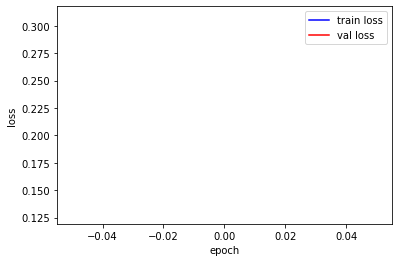

In [53]:
# loss vlsualization
plt.plot(hist.history['loss'], 'b', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#### confusion matrix
confusion matrix는 모델이 잘 작동되는지 확인할 수 있는 좋은 방법이다

- tf.argmax(a, 0) : 배열에서 가장 큰 값을 찾아 인덱스를 리턴

In [54]:
Y_pred = model.predict(X_val)

In [56]:
Y_pred_class = np.argmax(Y_pred, axis=1)

In [58]:
Y_valid = np.argmax(Y_val, axis=1)

In [78]:
# compute the confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_valid, Y_pred_class)

Text(69.0, 0.5, 'validation label')

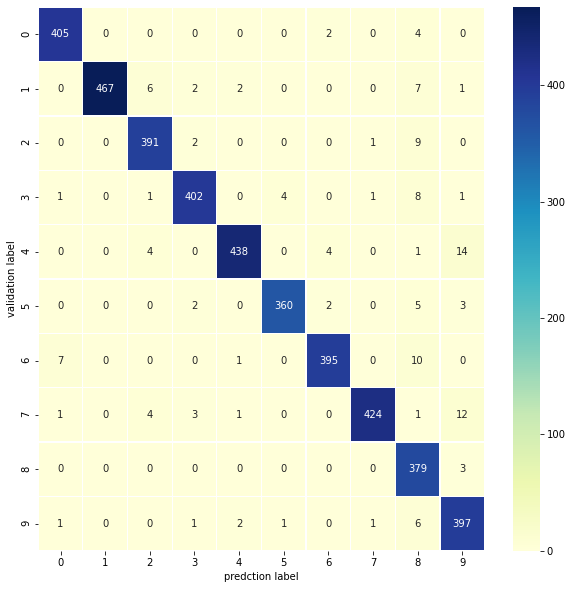

In [63]:
# plot the confusion matrix
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, linewidths=0.2,  fmt='d', cmap='YlGnBu', ax=ax)
plt.xlabel('predction label')
plt.ylabel('validation label')

### Creating Submission File

In [64]:
pred_test = model.predict(test)

In [68]:
result = np.argmax(pred_test, axis=1)

In [69]:
submission = pd.DataFrame({'ImageId' : range(1,28001), 'Label' : result})

In [70]:
submission.to_csv('submission.csv', index=False)